Tools & Libraries used are TensorFlow2, Keras, Matplotlib, Numpy, Pandas, Google colab

# Environment setup

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
# %cd <path to working folder>

In [129]:
import warnings
warnings.filterwarnings('ignore')

# 1. Importing Modules :

In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 2. Loading the Dataset :
Here, `header=0` indicates the line which could be used as the header of the data loaded from the specified csv file

In [131]:
df = pd.read_csv('prices.csv', header = 0)
print(df.shape)
df.head()

(851264, 7)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# 3. Filter YAHOO data :

In [132]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [133]:
df_yahoo = df[df['symbol']=='YHOO']
print(df_yahoo.shape)
df_yahoo.head()

(1762, 7)


,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


# 4. Explore YAHOO data :

In [134]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105000,1.639070e+07
75%,37.335000,37.377500,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [135]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

There are no missing values in the YAHOO dataset, which apparently indicates a good state of our data.

# 5. Clean YAHOO data :

5.1 Setting the Index for the Data Frame

In [136]:
print(df_yahoo.date.dtype)

object


In [137]:
df_yahoo['date'] = pd.to_datetime(df_yahoo['date'])
print(df_yahoo.date.dtype)

datetime64[ns]


In [138]:
df_yahoo = df_yahoo.set_index('date')
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


5.2 Setting the Frequency to Business Days :

In [139]:
df_yahoo.shape

(1762, 6)

In [140]:
data_yahoo = df_yahoo.asfreq('b')
data_yahoo.shape

(1825, 6)

In [141]:
data_yahoo.tail()
data_yahoo.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

Certainly there would be missing value in the introduced rows

5.3 Getting the Dates of Missing Values :

In [142]:
null_data = data_yahoo[data_yahoo.isnull().any(axis=1)]
null_data.head()
null_dates = null_data.index.tolist()
print(null_dates)

[Timestamp('2010-01-18 00:00:00'), Timestamp('2010-02-15 00:00:00'), Timestamp('2010-04-02 00:00:00'), Timestamp('2010-05-31 00:00:00'), Timestamp('2010-07-05 00:00:00'), Timestamp('2010-09-06 00:00:00'), Timestamp('2010-11-25 00:00:00'), Timestamp('2010-12-24 00:00:00'), Timestamp('2011-01-17 00:00:00'), Timestamp('2011-02-21 00:00:00'), Timestamp('2011-04-22 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-07-04 00:00:00'), Timestamp('2011-09-05 00:00:00'), Timestamp('2011-11-24 00:00:00'), Timestamp('2011-12-26 00:00:00'), Timestamp('2012-01-02 00:00:00'), Timestamp('2012-01-16 00:00:00'), Timestamp('2012-02-20 00:00:00'), Timestamp('2012-04-06 00:00:00'), Timestamp('2012-05-28 00:00:00'), Timestamp('2012-07-04 00:00:00'), Timestamp('2012-09-03 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00'), Timestamp('2012-11-22 00:00:00'), Timestamp('2012-12-25 00:00:00'), Timestamp('2013-01-01 00:00:00'), Timestamp('2013-01-21 00:00:00'), Timestamp('20

5.4 Filtering out the Holidays :

A quick check at the NYSE official website would help us know the list of [official holidays of NYSE](https://www.nyse.com/markets/hours-calendars).

We use the `calendar` module and `datetime` module to check if a given date in the `null_dates` list is a holiday or not

- Determining if that week or day name of the date in that month is a holiday or not. For example, Washington's Birthday is celebrated on the third Monday of February.
- So we extract the week, day, month, year from a given date in `null_dates`, and check if the day falls between 15 and 21(the possible day range of third Monday) and if the week is Monday.
- If yes, then it is a holiday. Then we append that date in the `holidays` list. We took a list of the dates when Good Friday occurs since there is no particular way to determine it.
- Finally, after obtaining the entire list of `holidays`, we filter out the holidays dates from `null_dates` and store the non-holiday dates in the list `non_holidays`.

Here’s the function that does that :

In [143]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

In [144]:
good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


We find that the values are missing for October 29th and 30th of 2012.

5.5 Getting the Modified Data :

In [145]:
data_yahoo.shape

(1825, 6)

In [146]:
modified_df = data_yahoo.drop(holidays)
modified_df.shape

(1764, 6)

# 6. Filling the Missing Values :

Pandas provides some built-in methods to do this job.

- `bfill` - used to backward fill or use the next valid observation to fill the missing values in the dataset.
- `ffill` - used to forward fill or use the previous valid observation to fill the missing values in the dataset.
- using `fillna(metohd='bfill')` is another way of achieving the job using backward filling. Similarly, one could use `ffill` or any other way like `mean()`.

We will use `bfill()` to fill the two missing values.

- The number of missing values in each column in `modified_data` using `isna().sum()`

In [147]:
print("Before filling missing values:\n", modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64


In [148]:
modified_df = modified_df.bfill(axis='rows')
print("\nAfter filling missing values:\n",modified_df.isna().sum())


After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


# 7. Visualizing YAHOO Data :

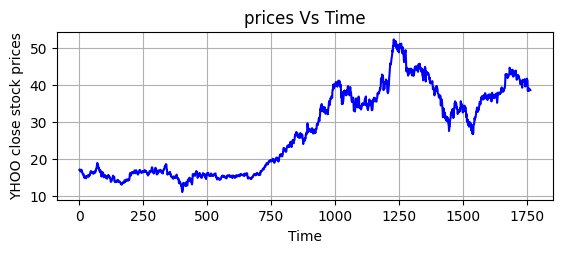

In [149]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

# 8. Splitting the Data :

In [150]:
n_train = int(len(closing_stock) * 0.8)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining * 0.5)
n_test = n_remaining - n_val

print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 1411 Validation Samples: 176 Test Samples: 177


We will :

- Slice the `closing_stock` from 0 till `n_train` to form the `train_data` set.
- Slice the `closing_stock` from `n_train` till `n_train+n_val` to form the `val_data`, the validation set.
- Slice the `closing_stock` from `n_train+n_val` till the end to form the `test_data` set.

In [151]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

test_data = closing_stock[n_train+n_val:]
print(test_data.shape)

(1411, 1)
(176, 1)
(177, 1)


# 9. Feature Scaling :

We will use `MinMaxScaler`, from `sklearn` sklearn library to scale the values into the range of 0 and 1.

- Use `fit_transform` to transform features by scaling each feature. We shall do this fitting on the train data `train_data`.
- Then, use the `transform` method on the same scaler to transform the values of `val_data` and `test_data`.

In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train_data)
val = scaler.transform(val_data)
test = scaler.transform(test_data)

## 10. Create the Datasets :

We’re using GRU, which is one of the quite useful deep learning algorithms to deal with time-series data.

It expects the input data to be three-dimensional :

1. The batch size
2. The timestamps
3. The number of features.

To create the data set, we define the `create_dataset` function.

The logic is the following, we will be traversing till the last third row of the dataset, combine every two consecutive values as one input, and put the third value as the value to be predicted (ground truth of prediction).

In [153]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [154]:
n_features = 2

train_X, train_Y = create_dataset(train, n_features)
val_X, val_Y = create_dataset(val, n_features)
test_X, test_Y = create_dataset(test, n_features)

print(train_X.shape , train_Y.shape , val_X.shape , val_Y.shape, test_X.shape , test_Y.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [155]:
train_X = train_X.reshape(train_X.shape[0] , 1 ,train_X.shape[1])
val_X = val_X.reshape(val_X.shape[0] , 1 ,val_X.shape[1])
test_X = test_X.reshape(test_X.shape[0] , 1 ,test_X.shape[1])

print(train_X.shape , train_Y.shape , val_X.shape , val_Y.shape, test_X.shape , test_Y.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


# 11. Building the Model :

In [156]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [157]:
model = keras.Sequential()

# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [158]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

In [159]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 1, 100)            31200     
                                                                 
 dropout_15 (Dropout)        (None, 1, 100)            0         
                                                                 
 gru_16 (GRU)                (None, 1, 150)            113400    
                                                                 
 dropout_16 (Dropout)        (None, 1, 150)            0         
                                                                 
 gru_17 (GRU)                (None, 100)               75600     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [160]:
history = model.fit(train_X,train_Y,epochs=100,batch_size=128, verbose=1, validation_data = (val_X,val_Y))

Epoch 1/100
11/11 [==============================] - 6s 139ms/step - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 2/100
11/11 [==============================] - 0s 18ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 3/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 9.8769e-04 - val_mean_squared_error: 9.8769e-04
Epoch 4/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 5/100
11/11 [==============================] - 0s 18ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 5.3194e-04 - val_mean_squared_error: 5.3194e-04
Epoch 6/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/100

# 12. Evaluate the Model :

In [161]:
print('Train Score:')
print(model.evaluate(train_X, train_Y, verbose=0))

print('Validation Score:')
print(model.evaluate(val_X, val_Y, verbose=0))

Train Score:
[0.00018636611639522016, 0.00018636611639522016]
Validation Score:
[0.00038067850982770324, 0.00038067850982770324]


In [162]:
print('Test Score:')
print(model.evaluate(test_X, test_Y, verbose=0))

Test Score:
[0.0002421656681690365, 0.0002421656681690365]


In [163]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


# 13. Visualizing Loss vs Epochs :

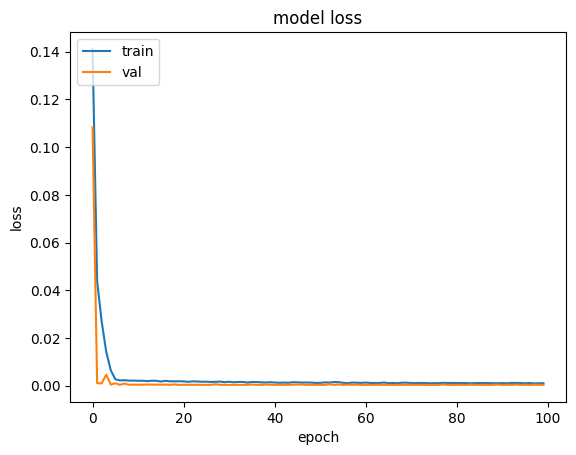

In [164]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 14. Visualizing Predictions vs Ground Truths :

In [165]:
pred = model.predict(test_X)

6/6 [==============================] - 1s 4ms/step


In [166]:
pred = scaler.inverse_transform(pred)
print(pred[:10])

[[37.67271 ]
 [37.452915]
 [37.28788 ]
 [37.14761 ]
 [36.87298 ]
 [36.743797]
 [36.705776]
 [36.368908]
 [36.16721 ]
 [36.725025]]


In [167]:
test_Y_actual = test_Y.reshape(test_Y.shape[0], 1)
test_Y_actual = scaler.inverse_transform(test_Y_actual)

print(test_Y_actual[:10])

[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


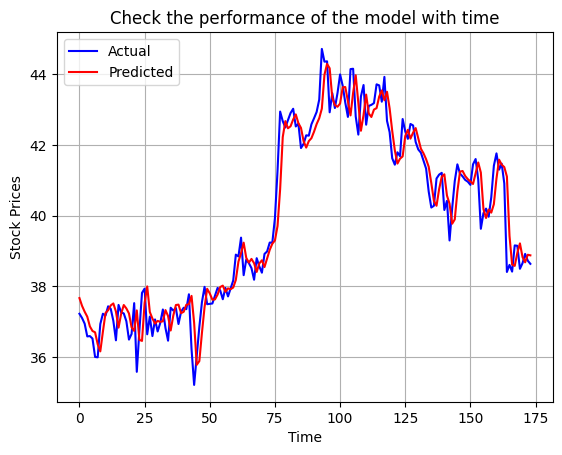

In [168]:
plt.plot(test_Y_actual, 'b')
plt.plot(pred, 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt .legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()